<a href="https://colab.research.google.com/github/Vaibhavi1630/dissertation/blob/main/CatsVsDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification of Cats and Dogs using Neural Network

## Data Gathering

In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://www.kaggle.com/" --header="Cookie: _ga=GA1.3.335780279.1668755863" --header="Connection: keep-alive" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3362/31148/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1669621780&Signature=Q8rcYu246cEHYkNmztiRWm5leDd8YPINjO%2FS05rYvmNTecpi5Z5TOtbPnWwViNYClH4T60QiLY5gV7r7LIkoD02V4YtNQEWk%2Fdta4ntXgQZoIiCjsWz2pIu7miu2%2BBx%2BLrStFwN2DME64GM0Mp9DIVnqY855ee8PG1W%2F6SNIOnFIVmdw2ZsXmR8OZk0225Gyf0DrhMBf8%2B7pAcx44nOGRZVeK4odDjhDG3YGXuWBq%2BFKzzocHZ4A0EnO%2BAKGqfFLq7vR5F4B%2BhqsXcNj%2FnYujXsWQQyWfyHvuSl21lCtBQDDh5Ia7qGfXi8NQqI5SAlq7uF3GB0Fhz5nCdj90MzjRA%3D%3D&response-content-disposition=attachment%3B+filename%3Ddogs-vs-cats.zip" -c -O 'dogs-vs-cats.zip'

--2022-11-25 15:16:14--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/3362/31148/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1669621780&Signature=Q8rcYu246cEHYkNmztiRWm5leDd8YPINjO%2FS05rYvmNTecpi5Z5TOtbPnWwViNYClH4T60QiLY5gV7r7LIkoD02V4YtNQEWk%2Fdta4ntXgQZoIiCjsWz2pIu7miu2%2BBx%2BLrStFwN2DME64GM0Mp9DIVnqY855ee8PG1W%2F6SNIOnFIVmdw2ZsXmR8OZk0225Gyf0DrhMBf8%2B7pAcx44nOGRZVeK4odDjhDG3YGXuWBq%2BFKzzocHZ4A0EnO%2BAKGqfFLq7vR5F4B%2BhqsXcNj%2FnYujXsWQQyWfyHvuSl21lCtBQDDh5Ia7qGfXi8NQqI5SAlq7uF3GB0Fhz5nCdj90MzjRA%3D%3D&response-content-disposition=attachment%3B+filename%3Ddogs-vs-cats.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 851576689 (812M) [application/zip]
Saving to: ‘dogs-vs-cats.zip’

dogs-vs-cats.zip    

In [ ]:
!unzip "dogs-vs-cats.zip"

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


## Data Preparation

In [ ]:
# Importing Required Libraries

import os
import PIL
import numpy as np
import pandas as pd
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from zipfile import ZipFile as zipper
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Creating Image Folder
!mkdir './Images'

In [ ]:
# Unzipping train and test files into Image folder
!unzip './train.zip' -d './Images/'
!unzip './test1.zip' -d './Images/'

In [ ]:
### Creating Dataframe and Labelling Data (i.e. DOG==1 AND CAT==0)

# Train Dataframe
train_df = pd.DataFrame({'file': os.listdir('./Images/train')})
labels = []
binary_labels = []
for i in os.listdir('./Images/train'):
    if 'dog' in i:
        labels.append('dog')
        binary_labels.append(1)
    else:
        labels.append('cat')
        binary_labels.append(0)

train_df['labels'] = labels
train_df['binary_labels'] = binary_labels

# Test Dataframe
test_df = pd.DataFrame({'file': os.listdir('./Images/test1')})

In [ ]:
train_df.head()

,file,labels,binary_labels
0,cat.12000.jpg,cat,0
1,cat.416.jpg,cat,0
2,cat.5110.jpg,cat,0
3,dog.5798.jpg,dog,1
4,dog.1118.jpg,dog,1


In [ ]:
test_df.head()

,file
0,354.jpg
1,3806.jpg
2,2864.jpg
3,1140.jpg
4,1334.jpg


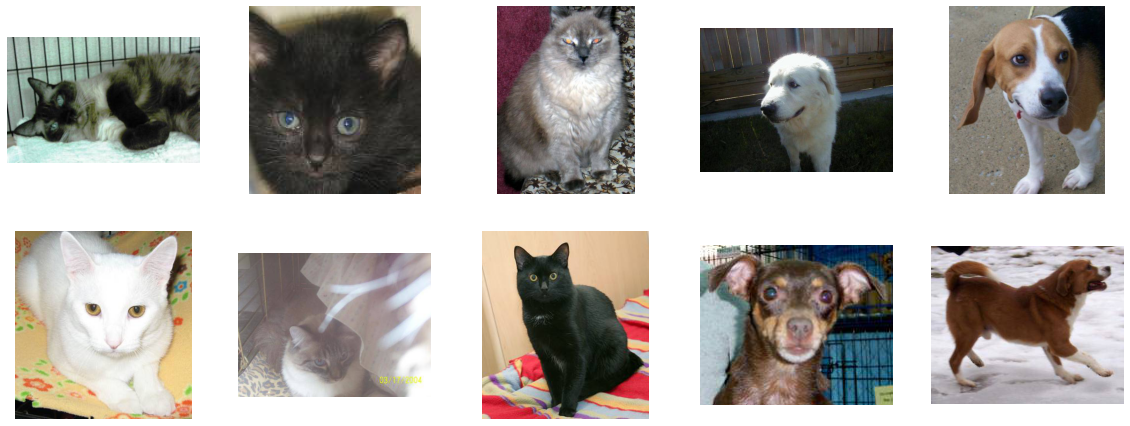

In [ ]:
filepath = './Images/train/'

### Visualising dataset
fig = plt.figure(1, figsize = (16, 16))

for i in range(10):

    plt.subplot(5, 5, i + 1)
    pic = PIL.Image.open(filepath + os.listdir(filepath)[i])
    plt.imshow(pic)
    plt.axis('off')

plt.show()

In [ ]:
### Splitting Dataset into Train(90%) and validation(10%)
train_set, val_set = train_test_split(train_df, test_size=0.1)

print("Length of train dataset: ", len(train_set), "Length of Test dataset: ",  len(val_set))

22500 2500


(-0.5, 148.5, 162.5, -0.5)

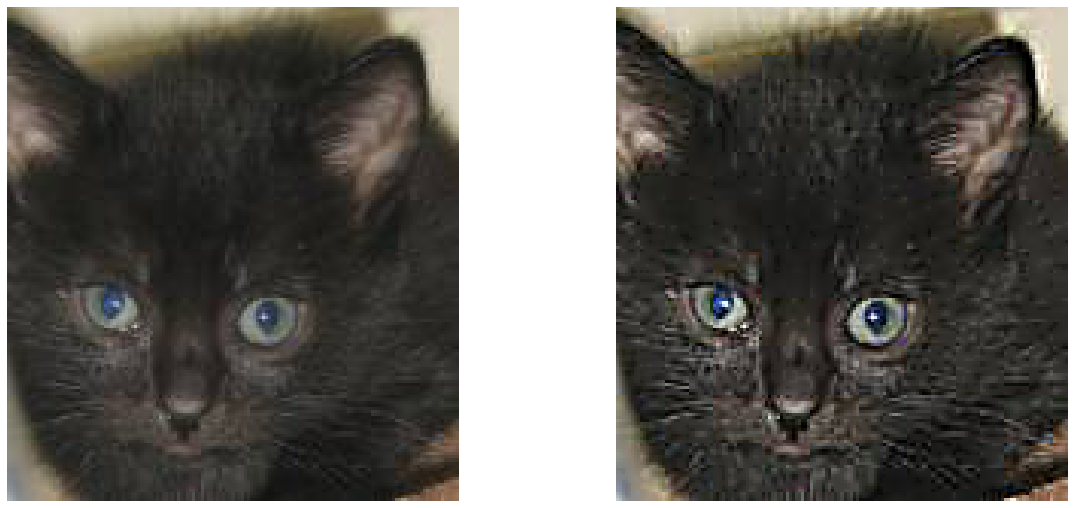

In [ ]:
### Preprocessing Data ####

img = PIL.Image.open(filepath + os.listdir(filepath)[1])
img_new = img.filter(PIL.ImageFilter.UnsharpMask(radius=2, percent=150))

fig = plt.figure(1, figsize = (20, 20))
plt.subplot(2,2,1)

plt.imshow(img)
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(img_new)

plt.axis('off')

(-0.5, 148.5, 162.5, -0.5)

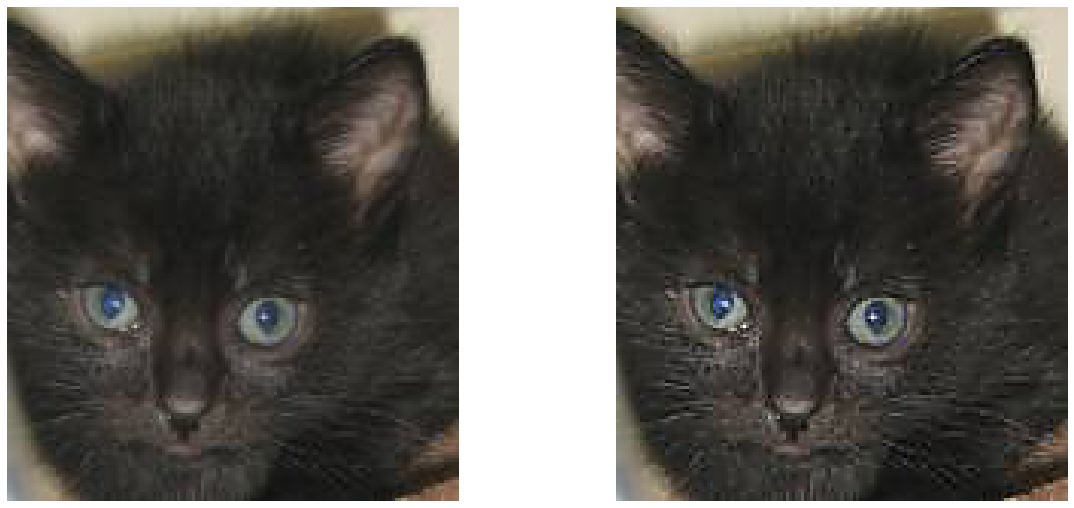

In [ ]:
### Trying Different Filters

img = PIL.Image.open(filepath + os.listdir(filepath)[1])
img_new = img.filter(PIL.ImageFilter.UnsharpMask(radius=1, percent=100))

fig = plt.figure(1, figsize = (20, 20))

plt.subplot(2,2,1)
plt.imshow(img)
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(img_new)
plt.axis('off')

In [ ]:
### Preprocessing whole data and overwriting it on original data
for i in tqdm(range(len(os.listdir(filepath)))):

    path_to_pic = filepath + os.listdir(filepath)[i]
    pic = PIL.Image.open(path_to_pic)
    sharp_pic = pic.filter(PIL.ImageFilter.UnsharpMask(radius=2, percent=100))
    sharp_pic.save(path_to_pic)

100%|██████████| 25000/25000 [11:34<00:00, 35.98it/s]


In [ ]:
### Declaring Batch Size (To scale down the data or image arrays)

train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

batch_size = 128

In [ ]:
### Loading Data using Generator

train_generator = train_gen.flow_from_dataframe(
    dataframe = train_set,
    directory = './Images/train/',
    x_col = 'file',
    y_col = 'labels',
    class_mode = 'categorical',
    target_size = (224,224),
    batch_size = batch_size
)


validation_generator = val_gen.flow_from_dataframe(
    dataframe = val_set,
    directory = './Images/train/',
    x_col = 'file',
    y_col = 'labels',
    class_mode = 'categorical',
    target_size = (224,224),
    batch_size = batch_size,
    shuffle = False
)

Found 22500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


In [ ]:
### Data Augmentation
data_augmentation = keras.Sequential([layers.RandomFlip("horizontal", input_shape=(224,224,3)), layers.RandomRotation(0.1), layers.RandomZoom(0.1),])

## Modelling

In [ ]:
### Declaring Input Size
input_shape = (224, 224, 3)

n_class = 2
### Creating Custom Model

model = Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation = 'softmax')
])

In [ ]:
### Compiling Model with optimizer as "ADAM"
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
### Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 108, 108, 64)      18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 106, 106, 64)      36928     
                                                      

### Training Model

In [ ]:
### Training model on GPU
with tf.device('/device:GPU:1'):
    ### 40 epochs
    epochs=40
    
    history = model.fit_generator(train_generator, 
                            validation_data=validation_generator, 
                            epochs=epochs,
                            validation_steps = val_set.shape[0] // batch_size,
                            steps_per_epoch = train_set.shape[0] // batch_size)

Epoch 1/40
175/175 [==============================] - 142s 753ms/step - loss: 0.6937 - accuracy: 0.5489 - val_loss: 0.6442 - val_accuracy: 0.6188
Epoch 2/40
175/175 [==============================] - 125s 712ms/step - loss: 0.6177 - accuracy: 0.6478 - val_loss: 0.6026 - val_accuracy: 0.6928
Epoch 3/40
175/175 [==============================] - 123s 703ms/step - loss: 0.5505 - accuracy: 0.7153 - val_loss: 0.5418 - val_accuracy: 0.7266
Epoch 4/40
175/175 [==============================] - 124s 707ms/step - loss: 0.4988 - accuracy: 0.7580 - val_loss: 0.4576 - val_accuracy: 0.7956
Epoch 5/40
175/175 [==============================] - 123s 701ms/step - loss: 0.4559 - accuracy: 0.7853 - val_loss: 0.4155 - val_accuracy: 0.8109
Epoch 6/40
175/175 [==============================] - 123s 702ms/step - loss: 0.4232 - accuracy: 0.8049 - val_loss: 0.4046 - val_accuracy: 0.8154
Epoch 7/40
175/175 [==============================] - 124s 705ms/step - loss: 0.3924 - accuracy: 0.8245 - val_loss: 0.3752 -

### Plotting Training and Validation Accuracy and Loss

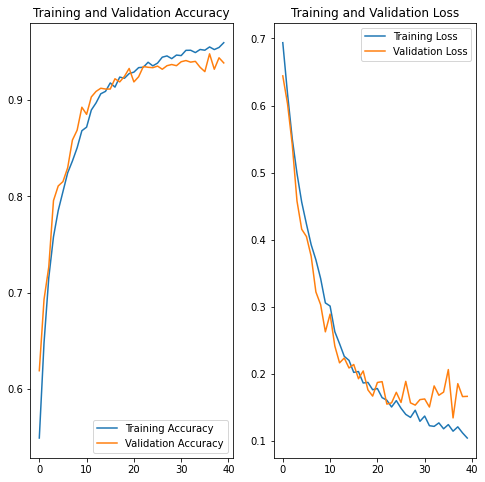

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

### Epochs range should be same as Number of epochs given in Training
epochs_range = range(40)

plt.figure(figsize=(8, 8))

### Graph for Training and Validation Accuracy
plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

### Graph for Training and Validation Loss
plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
### Validating Data on model
with tf.device('/device:GPU:1'):
    val_pred = model.predict(validation_generator, steps = np.ceil(val_set.shape[0] / batch_size))

20/20 [==============================] - 11s 552ms/step


In [ ]:
val_set['normalpreds'] = np.argmax(val_pred, axis = -1)
labels = dict((v,k) for k,v in train_generator.class_indices.items())

val_set['normalpreds'] = val_set['normalpreds'].map(labels)

In [ ]:
val_set.head(20)

,file,labels,binary_labels,normalpreds
1459,cat.6657.jpg,cat,0,cat
719,cat.1535.jpg,cat,0,cat
6285,cat.11141.jpg,cat,0,cat
13925,dog.9360.jpg,dog,1,cat
17835,cat.5213.jpg,cat,0,cat
13035,dog.11619.jpg,dog,1,dog
15003,cat.11454.jpg,cat,0,cat
19272,cat.8675.jpg,cat,0,dog
7801,cat.8892.jpg,cat,0,dog
19497,cat.5924.jpg,cat,0,dog


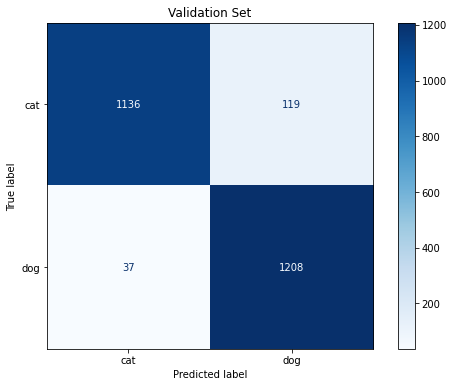

In [ ]:
fig, ax = plt.subplots(figsize = (9, 6))

### Plotting Confusion Matrix of Validation Data
cm = confusion_matrix(val_set["labels"], val_set["normalpreds"])

### Styling Confusion Matrix with colour Blue
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["cat", "dog"])
disp.plot(cmap = plt.cm.Blues, ax = ax)

ax.set_title("Validation Set")
plt.show()

In [ ]:
### Getting Classification Report of Model performance
print(classification_report(val_set["labels"], val_set["normalpreds"]))

              precision    recall  f1-score   support

         cat       0.97      0.91      0.94      1255
         dog       0.91      0.97      0.94      1245

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500



In [ ]:
### Saving the Model

!mkdir -p saved_models
model.save('saved_models/VGG_16')
os.listdir('saved_models/VGG_16')

['assets', 'variables', 'keras_metadata.pb', 'saved_model.pb']

In [ ]:
### Copying the Model weights to cloud
!cp -r "/content/saved_models" "/content/drive/MyDrive/CatsVSDogs"